In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline


In [ ]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('/content/drive/MyDrive/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Возьмите датасет из 8-й лабораторной работы (набор данных о ценах на жилье). Выполните подготовку датасета для последующей работы. 1) Оставьте столбцы с числовыми данными - остальные удалите. Не забудьте удалить столбец с нумерацией строк. Сколько столбцов осталось?

In [ ]:
num_df = df.select_dtypes(include='number').drop(columns=['Id'])
print('Количество оставшихся столбцов:', num_df.shape[1])

Количество оставшихся столбцов: 37


In [ ]:
num_df.isnull().sum()

,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0
BsmtFinSF2,0


In [ ]:
num_df = num_df.drop(columns=['LotFrontage', 'GarageYrBlt'])

 2) Удалите строки с пропущенными данными. Сколько строк осталось?


In [ ]:
num_df = num_df.dropna()
print('Количество оставшихся строк:', num_df.shape[0])

Количество оставшихся строк: 1452


3) Постройте тепловую матрицу корреляции без учета целевого столбца (цена продажи). Используя метод corr Pandas получите числовую матрицу корреляции признаков. Проведите анализ полученных результатов. Имеет ли смысл какие-то столбцы удалить после проведенного анализа? Укажите 10 признаков с наибольшей корреляцией.

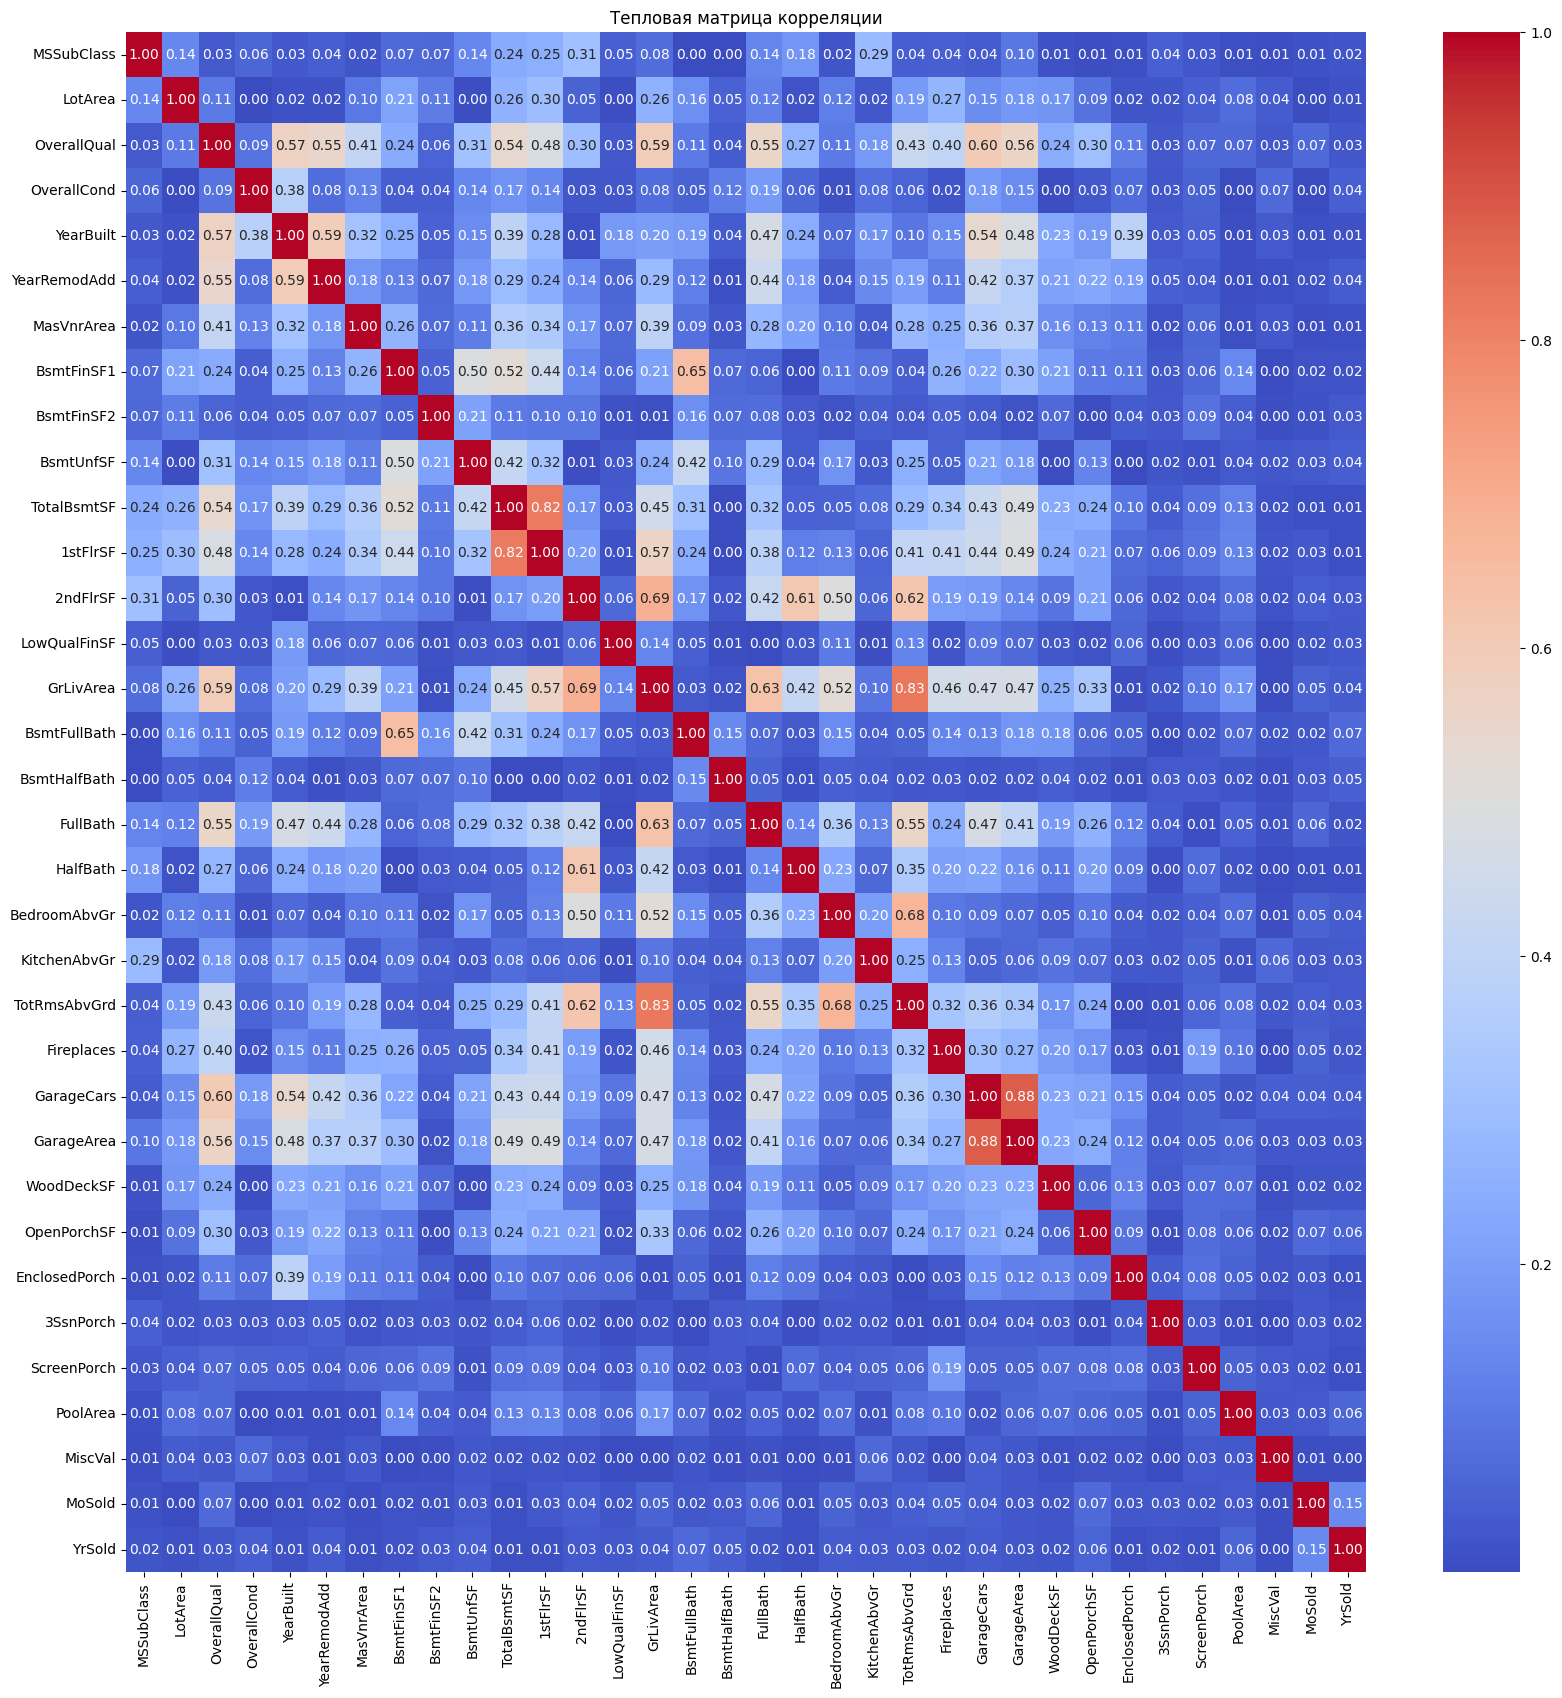

In [ ]:
num_df.drop_duplicates()
corr = num_df.drop(columns=['SalePrice']).corr().abs()

plt.figure(figsize=(20, 20))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая матрица корреляции')
plt.show()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
corr2 = corr.mask(mask)
corr2.unstack().sort_values(ascending=False)[:10]

GarageCars    GarageArea      0.882332
GrLivArea     TotRmsAbvGrd    0.825476
TotalBsmtSF   1stFlrSF        0.818246
2ndFlrSF      GrLivArea       0.690178
BedroomAbvGr  TotRmsAbvGrd    0.675596
BsmtFinSF1    BsmtFullBath    0.647346
GrLivArea     FullBath        0.628983
2ndFlrSF      TotRmsAbvGrd    0.617677
              HalfBath        0.610154
OverallQual   GarageCars      0.599734
dtype: float64

In [ ]:
num_df = num_df.drop(columns=['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'])

corr = num_df.drop(columns=['SalePrice']).corr().abs()

mask = np.triu(np.ones_like(corr, dtype=bool))
corr2 = corr.mask(mask)
corr2.unstack().sort_values(ascending=False)[:10]

2ndFlrSF     GrLivArea       0.690178
BsmtFinSF1   BsmtFullBath    0.647346
GrLivArea    FullBath        0.628983
2ndFlrSF     HalfBath        0.610154
OverallQual  GarageCars      0.599734
             GrLivArea       0.594417
YearBuilt    YearRemodAdd    0.590674
OverallQual  YearBuilt       0.571111
             FullBath        0.552266
             YearRemodAdd    0.549573
dtype: float64

4) Отделите признаки и целевой столбец.

In [ ]:
X = num_df.drop(columns=['SalePrice'])
y = num_df['SalePrice']

 5) Разбейте на два множества - для обучения и для тестирования (70/30).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6) Обучите модель линейной регрессии и получите оценки качества модели: score, MAE, MSE, RMSE. Определите наиболее значимые признаки по весовым коэффициентам модели.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

r2_score = linear_reg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Score:", r2_score)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

coefficients = linear_reg.coef_
feature_names = X.columns
coefficients_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefficients})
coefficients_df = coefficients_df.sort_values(by='Коэффициент', ascending=False)

print("Наиболее значимые характеристики:")
coefficients_df.head()

Score: 0.8168823082494123
MAE: 24086.059929999337
MSE: 1463379009.1068065
RMSE: 38254.137150206465
Наиболее значимые характеристики:


,Признак,Коэффициент
22,GarageCars,21878.993157
3,OverallQual,19507.711986
15,BsmtFullBath,12547.843577
4,OverallCond,5291.172927
21,Fireplaces,4999.227618


7) Каждый столбец приведите к единичному масштабу. Определите 5 признаков с наибольшей дисперсией - возьмите их для выполнения следующего пункта. 2-й вариант - определите 5 признаков с наибольшей корреляцией с целевым столбцом и их возьмите для выполнения следующего задания. Не забудьте масштабировать целевой столбец.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.50,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.50,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.50,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.75,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.75,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,0.336077,0.0,0.247362,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.50,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1448,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,0.252373,0.000000,0.0,0.327619,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.50,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1449,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,0.188543,0.557869,0.0,0.377920,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.25,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1450,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,0.000000,0.176432,0.000000,0.0,0.140166,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.25,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [ ]:
y_scaled = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y_scaled)
y_scaled

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

In [ ]:
largest_var_columns = X_scaled_df.var().nlargest(5).index
largest_var_columns

Index(['YearRemodAdd', 'YrSold', 'HalfBath', 'MSSubClass', 'MoSold'], dtype='object')

8) Изучив приложенный материал, постройте валидационную кривую по различным степеням полиномиальной модели. Определите оптимальную степень полинома, постройте заново регрессионную модель и сравните полученные качественные оценки модели с п. 6.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

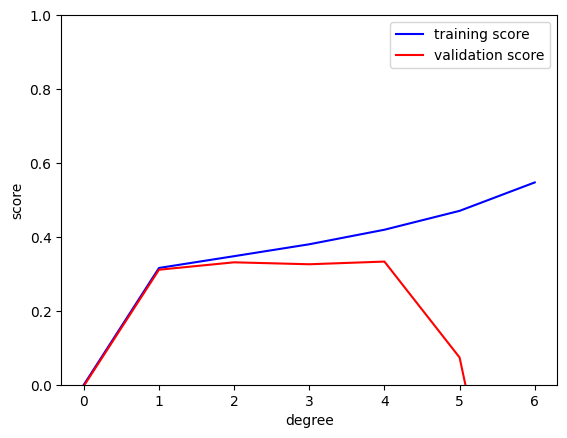

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

degrees = np.arange(0, 7)
train_score, val_score = validation_curve(PolynomialRegression(), X_scaled_df[largest_var_columns], y_scaled, param_name='polynomialfeatures__degree', param_range=degrees, cv=7)

plt.plot(degrees, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degrees, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()


Оптимальная степень - 2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df[largest_var_columns], y_scaled, test_size=0.3, random_state=42)

poly_reg = PolynomialRegression(2)
poly_reg.fit(X_train, y_train)

y_pred = poly_reg.predict(X_test)

r2_score = poly_reg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Score:", r2_score)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Score: 0.3306745219938605
MAE: 0.062162822832615955
MSE: 0.007952320393160643
RMSE: 0.08917578367001124


2-й вариант - определите 5 признаков с наибольшей корреляцией с целевым столбцом и их возьмите для выполнения следующего задания

In [ ]:
concated = pd.concat([X_scaled_df, pd.DataFrame(y_scaled, columns=['SalePrice'])], axis=1)
correlation_matrix = concated.corr()
correlation_with_target = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
correlation_with_target[1:6]

,SalePrice
OverallQual,0.789997
GrLivArea,0.710080
GarageCars,0.639686
TotalBsmtSF,0.612971
FullBath,0.562491


In [ ]:
correlation_columns = correlation_with_target[1:6].index
correlation_columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath'], dtype='object')

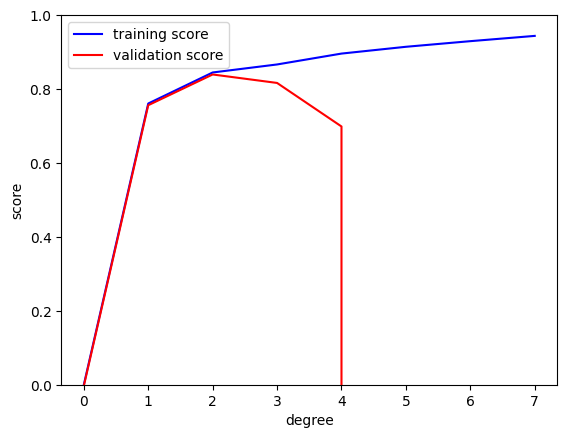

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

degrees = np.arange(0, 8)
train_score, val_score = validation_curve(PolynomialRegression(), X_scaled_df[correlation_columns], y_scaled, param_name='polynomialfeatures__degree', param_range=degrees, cv=7)

plt.plot(degrees, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degrees, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

Оптимальная степень - 2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df[correlation_columns], y_scaled, test_size=0.3, random_state=42)

poly_reg = PolynomialRegression(2)
poly_reg.fit(X_train, y_train)

y_pred = poly_reg.predict(X_test)

r2_score = poly_reg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Score:", r2_score)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Score: 0.7848802270442631
MAE: 0.02829145853165064
MSE: 0.002555858716963861
RMSE: 0.050555501352116575


Если брать столбцы, хорошо коррелирующие с целевым, то скор намного выше, чем если брать столбцы с самой большой дисперсией